In [1]:
# Import library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
# import data
df = pd.read_csv("mnist.csv", header= None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

In [5]:
### remove the first column
X = df.iloc[:, 1:]
y = df[0]

In [6]:
X.shape

(60000, 784)

In [7]:
X_2 = X.add_prefix('Pixel_')

In [8]:
X_2.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y.shape

(60000,)

# Probem 1.

### Perform PCA on the mnist Dataset

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(.98)
pca_result = pca.fit_transform(X)

In [12]:
pca_result.shape

(60000, 261)

In [13]:
prindf = pd.DataFrame(data = pca_result,
                     columns = ['PCA %i' % i for i in range(1,262)])

In [14]:
prindf.shape

(60000, 261)

In [15]:
prindf.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,...,PCA 252,PCA 253,PCA 254,PCA 255,PCA 256,PCA 257,PCA 258,PCA 259,PCA 260,PCA 261
0,123.932589,-312.674262,-24.514052,-555.757958,-27.296668,-232.476284,233.995733,159.799494,-363.515021,198.428077,...,-0.415482,-2.931581,-16.672997,-20.532127,49.887115,21.873197,5.631363,2.965679,-24.467148,38.564734
1,1011.718376,-294.857038,596.339561,-460.766197,-827.275222,-181.950528,-45.020478,-104.969592,40.459118,150.968899,...,-24.645556,13.463620,49.591564,7.025664,-1.880631,5.860862,36.527006,-30.713156,32.709520,-9.662481
2,-51.849608,392.173153,-188.509749,521.011347,-306.680729,-1.835346,-859.047199,368.591875,-114.546074,-178.508144,...,-26.719735,2.659139,36.970493,-19.557665,-7.728232,41.837487,57.075806,47.729891,2.449605,-19.011037
3,-799.127037,-607.197217,273.651240,105.878237,-1.853226,699.654696,-473.713204,-67.321708,302.731266,11.111365,...,-4.669944,-17.877496,27.409985,25.474739,22.287283,-0.781338,21.914323,-13.375715,58.554486,25.052474
4,-382.754942,730.542867,16.353747,-241.697519,98.161346,43.229727,-91.666599,-405.554885,225.501854,104.112265,...,-3.453413,-3.353972,1.741355,-4.893451,-36.895766,-43.826865,-27.441115,-12.342301,-10.561065,3.352427


# Problem 2.

### Number of PCs needed for 98% of the variance

In [16]:
pca.n_components_

261

# Problem 3. 

### Explained Variance by PC

In [17]:
explained_variance=pca.explained_variance_ratio_
var = pd.DataFrame({"Variance %":explained_variance})
w = ['PC %i' % i for i in range(1,262)]
var.index = w
var = var.T
var

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 252,PC 253,PC 254,PC 255,PC 256,PC 257,PC 258,PC 259,PC 260,PC 261
Variance %,0.097047,0.070959,0.061691,0.053894,0.048688,0.043122,0.032719,0.028839,0.02762,0.02357,...,0.000189,0.000188,0.000186,0.000186,0.000185,0.000184,0.000183,0.000182,0.00018,0.000178


In [18]:
var2 = pd.DataFrame({"PC": w,"Variance %":explained_variance})
var2["percent"] = round(var2["Variance %"] * 100,4)
var2.head()

,PC,Variance %,percent
0,PC 1,0.097047,9.7047
1,PC 2,0.070959,7.0959
2,PC 3,0.061691,6.1691
3,PC 4,0.053894,5.3894
4,PC 5,0.048688,4.8688


## Breakdown of PCs

### PC 1 - 25

In [19]:
var2.loc[0:24]

,PC,Variance %,percent
0,PC 1,0.097047,9.7047
1,PC 2,0.070959,7.0959
2,PC 3,0.061691,6.1691
3,PC 4,0.053894,5.3894
4,PC 5,0.048688,4.8688
5,PC 6,0.043122,4.3122
6,PC 7,0.032719,3.2719
7,PC 8,0.028839,2.8839
8,PC 9,0.027620,2.7620
9,PC 10,0.023570,2.3570


In [20]:
def plot_var(x,y):
    c = var2.iloc[x:y]
    sns.set_style("darkgrid")
    plt.figure(figsize = (14,8))
    b = sns.barplot(x = "PC", y = "percent", data = c)
    plt.xticks(rotation=90)
    plt.ylabel("% of Variance", fontsize = 20)
    plt.xlabel("PC", fontsize = 20)
    plt.title("PC % of Variance",fontsize = 20)
    for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')

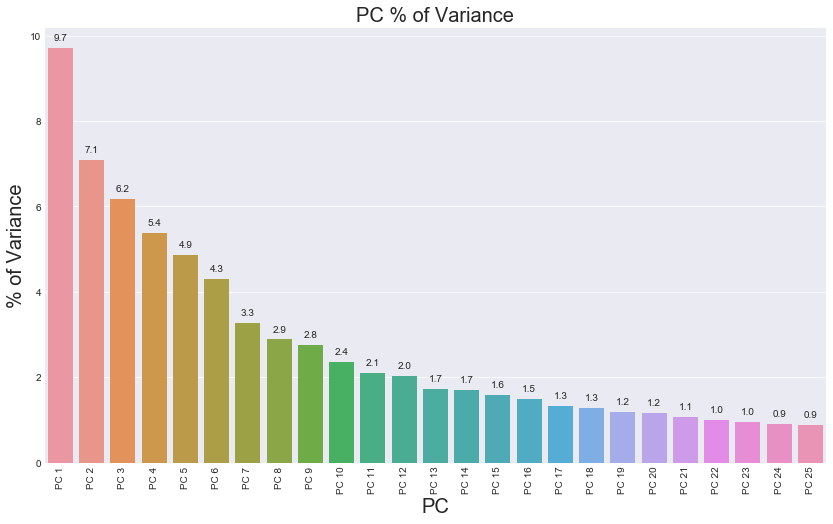

In [21]:
plot_var(0,25)

### PC 26-50

In [22]:
var2.loc[0:25]

,PC,Variance %,percent
0,PC 1,0.097047,9.7047
1,PC 2,0.070959,7.0959
2,PC 3,0.061691,6.1691
3,PC 4,0.053894,5.3894
4,PC 5,0.048688,4.8688
5,PC 6,0.043122,4.3122
6,PC 7,0.032719,3.2719
7,PC 8,0.028839,2.8839
8,PC 9,0.027620,2.7620
9,PC 10,0.023570,2.3570


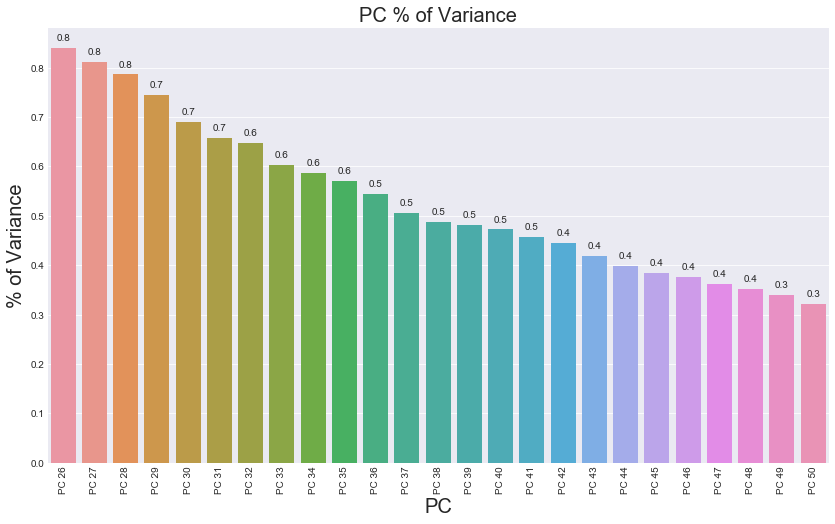

In [23]:
plot_var(25,50)

### PC 51-75

In [24]:
var2.loc[50:74]

,PC,Variance %,percent
50,PC 51,0.003190,0.3190
51,PC 52,0.003128,0.3128
52,PC 53,0.002960,0.2960
53,PC 54,0.002890,0.2890
54,PC 55,0.002841,0.2841
55,PC 56,0.002714,0.2714
56,PC 57,0.002695,0.2695
57,PC 58,0.002585,0.2585
58,PC 59,0.002538,0.2538
59,PC 60,0.002448,0.2448


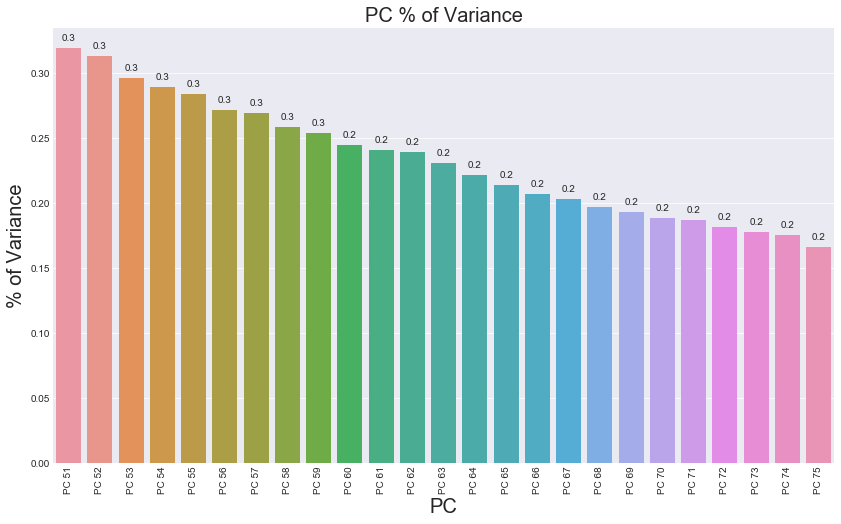

In [25]:
plot_var(50,75)

### PC 75-100

In [26]:
var2.loc[75:99]

,PC,Variance %,percent
75,PC 76,0.001639,0.1639
76,PC 77,0.001615,0.1615
77,PC 78,0.001551,0.1551
78,PC 79,0.001476,0.1476
79,PC 80,0.001432,0.1432
80,PC 81,0.001421,0.1421
81,PC 82,0.001412,0.1412
82,PC 83,0.001402,0.1402
83,PC 84,0.001357,0.1357
84,PC 85,0.001338,0.1338


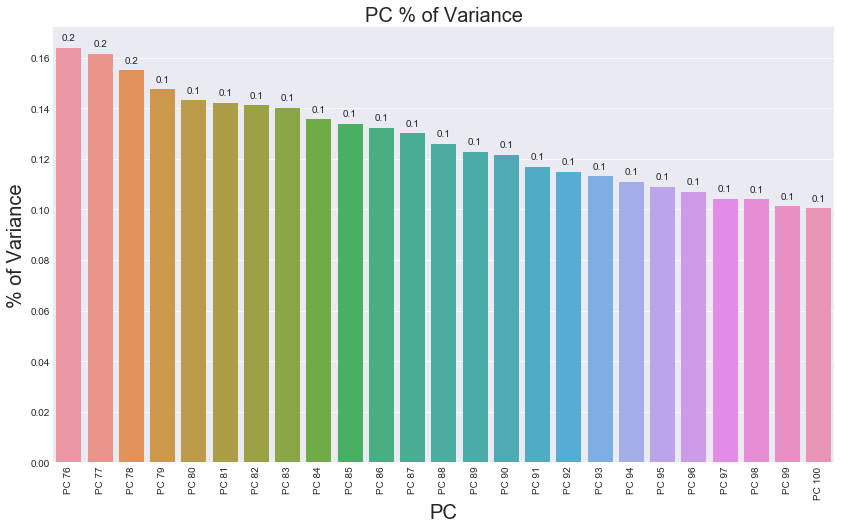

In [27]:
plot_var(75,100)

### PC 100-125

In [28]:
var2.loc[100:124]

,PC,Variance %,percent
100,PC 101,0.000984,0.0984
101,PC 102,0.000950,0.0950
102,PC 103,0.000941,0.0941
103,PC 104,0.000916,0.0916
104,PC 105,0.000908,0.0908
105,PC 106,0.000897,0.0897
106,PC 107,0.000865,0.0865
107,PC 108,0.000855,0.0855
108,PC 109,0.000846,0.0846
109,PC 110,0.000822,0.0822


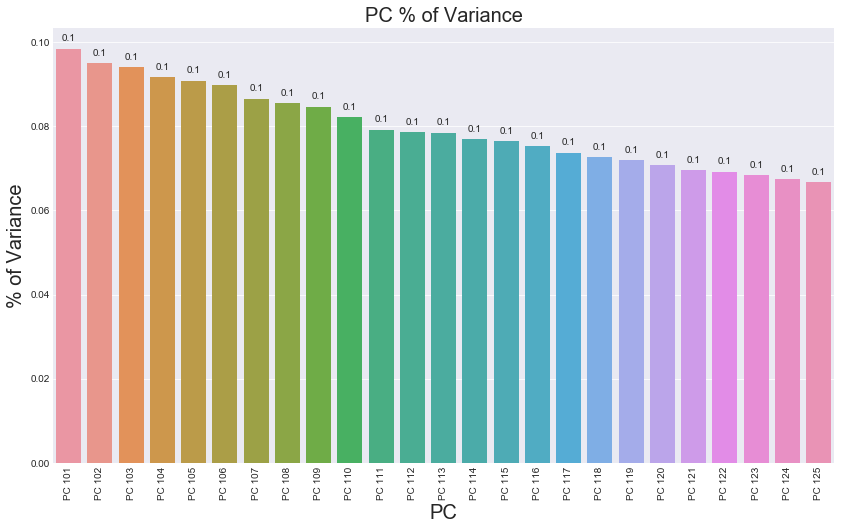

In [29]:
plot_var(100,125)

### PC 125-150

In [30]:
var2.loc[125:149]

,PC,Variance %,percent
125,PC 126,0.000645,0.0645
126,PC 127,0.000636,0.0636
127,PC 128,0.000632,0.0632
128,PC 129,0.000623,0.0623
129,PC 130,0.000605,0.0605
130,PC 131,0.000604,0.0604
131,PC 132,0.000594,0.0594
132,PC 133,0.000588,0.0588
133,PC 134,0.000587,0.0587
134,PC 135,0.000581,0.0581


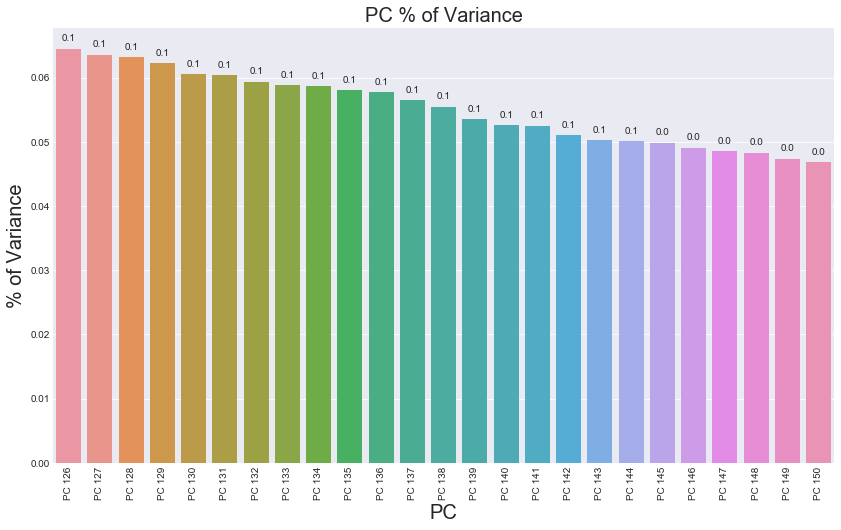

In [31]:
plot_var(125,150)

### PC 150-175

In [32]:
var2.loc[150:174]

,PC,Variance %,percent
150,PC 151,0.000467,0.0467
151,PC 152,0.000463,0.0463
152,PC 153,0.000459,0.0459
153,PC 154,0.000450,0.0450
154,PC 155,0.000449,0.0449
155,PC 156,0.000443,0.0443
156,PC 157,0.000437,0.0437
157,PC 158,0.000427,0.0427
158,PC 159,0.000425,0.0425
159,PC 160,0.000422,0.0422


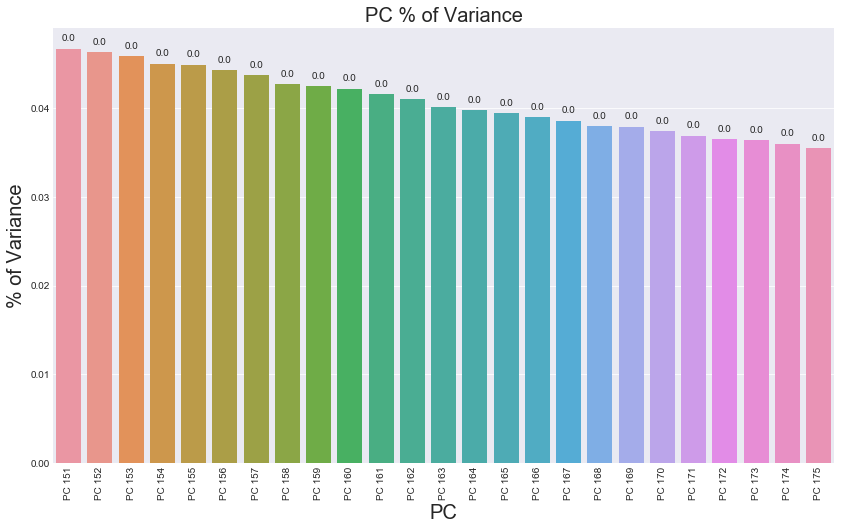

In [33]:
plot_var(150,175)

### PC 175-200

In [34]:
var2.loc[175:199]

,PC,Variance %,percent
175,PC 176,0.000353,0.0353
176,PC 177,0.000347,0.0347
177,PC 178,0.000346,0.0346
178,PC 179,0.000341,0.0341
179,PC 180,0.000338,0.0338
180,PC 181,0.000337,0.0337
181,PC 182,0.000330,0.0330
182,PC 183,0.000328,0.0328
183,PC 184,0.000326,0.0326
184,PC 185,0.000323,0.0323


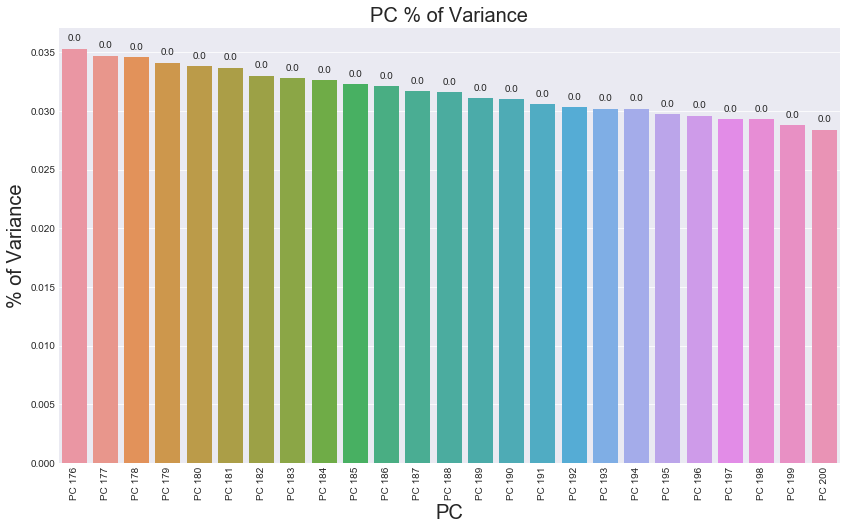

In [35]:
plot_var(175,200)

### PC 200-225

In [36]:
var2.loc[200:224]

,PC,Variance %,percent
200,PC 201,0.000282,0.0282
201,PC 202,0.000279,0.0279
202,PC 203,0.000276,0.0276
203,PC 204,0.000272,0.0272
204,PC 205,0.000269,0.0269
205,PC 206,0.000268,0.0268
206,PC 207,0.000265,0.0265
207,PC 208,0.000264,0.0264
208,PC 209,0.000262,0.0262
209,PC 210,0.000259,0.0259


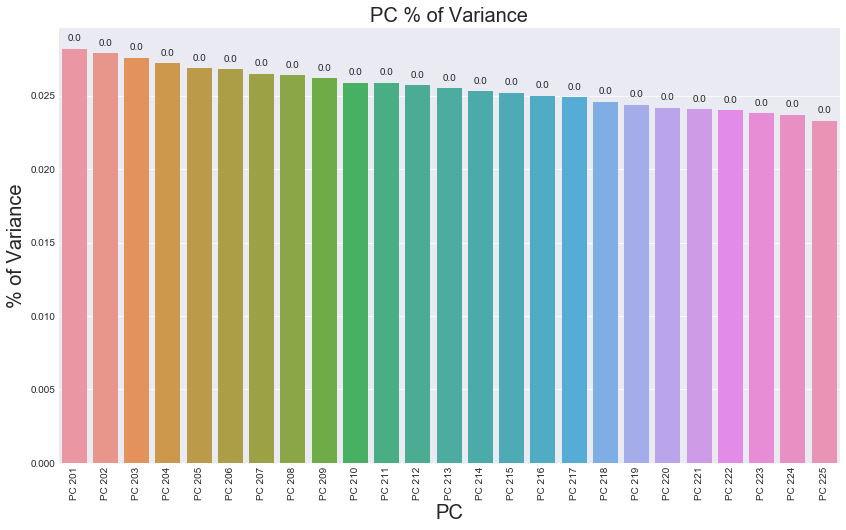

In [37]:
plot_var(200,225)

### PC 225 - 250

In [38]:
var2.loc[225:249]

,PC,Variance %,percent
225,PC 226,0.000231,0.0231
226,PC 227,0.000230,0.0230
227,PC 228,0.000228,0.0228
228,PC 229,0.000228,0.0228
229,PC 230,0.000223,0.0223
230,PC 231,0.000222,0.0222
231,PC 232,0.000220,0.0220
232,PC 233,0.000218,0.0218
233,PC 234,0.000217,0.0217
234,PC 235,0.000215,0.0215


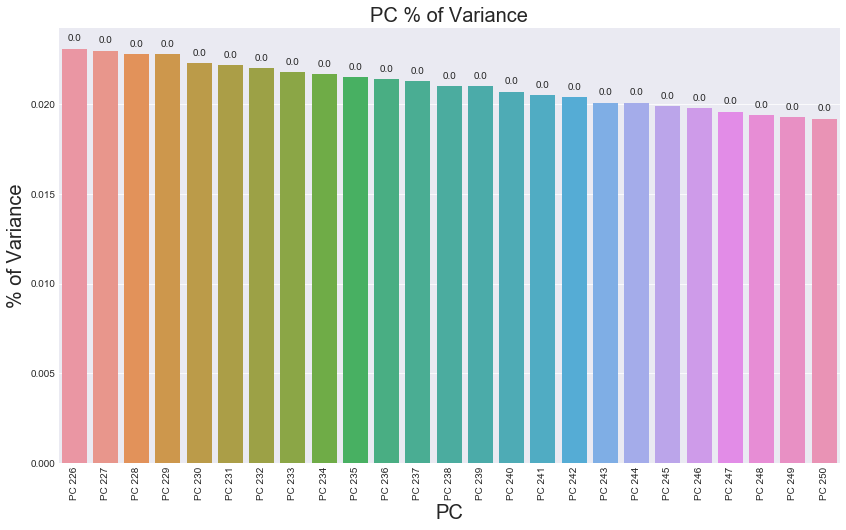

In [39]:
plot_var(225,250)

### PC 250-261

In [40]:
var2.loc[250:261]

,PC,Variance %,percent
250,PC 251,0.000192,0.0192
251,PC 252,0.000189,0.0189
252,PC 253,0.000188,0.0188
253,PC 254,0.000186,0.0186
254,PC 255,0.000186,0.0186
255,PC 256,0.000185,0.0185
256,PC 257,0.000184,0.0184
257,PC 258,0.000183,0.0183
258,PC 259,0.000182,0.0182
259,PC 260,0.000180,0.0180


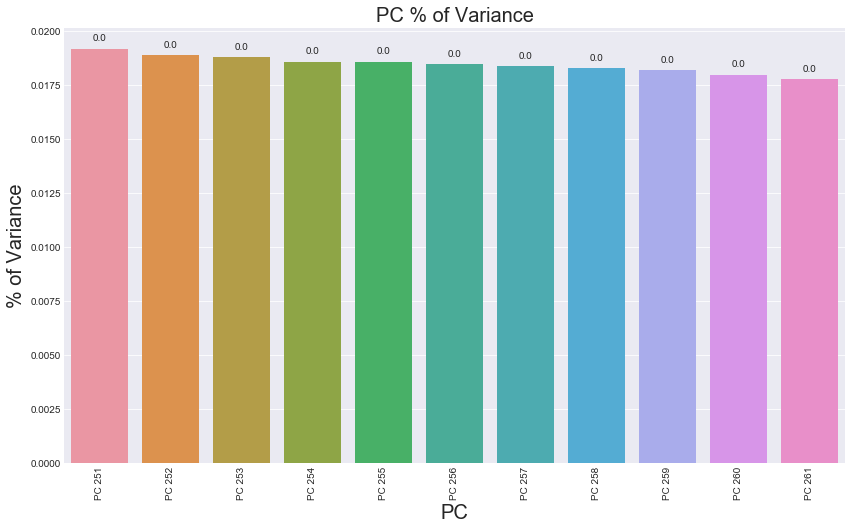

In [41]:
plot_var(250,261)

#  Problem 4.

In [42]:
pca.components_.shape

(261, 784)

### Create a DataFrame of Components

In [43]:
df2 = pd.DataFrame(pca.components_)
df3 = df2.add_prefix('Pixel_')
df3.head()
w = ['PC %i' % i for i in range(1,262)]
df3.index = w
df3.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783
PC 1,5.265725e-20,2.775558e-17,1.110223e-16,0.000000e+00,0.000000e+00,-5.551115e-17,0.000000e+00,0.000000e+00,8.673617e-19,-1.084202e-19,...,-0.000013,0.000017,0.000006,-2.593636e-07,-4.952733e-07,1.378420e-07,0.0,0.0,0.0,0.0
PC 2,-1.816922e-19,-8.326673e-17,-5.551115e-17,5.551115e-17,5.551115e-17,1.110223e-16,-5.551115e-17,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000500,0.000219,0.000109,3.548438e-05,2.127952e-05,2.223383e-06,0.0,0.0,0.0,0.0
PC 3,-1.638503e-20,-1.630640e-16,-4.857226e-17,-1.908196e-17,-1.387779e-17,6.938894e-18,9.540979e-17,2.081668e-17,2.775558e-17,-0.000000e+00,...,-0.000488,-0.000211,-0.000091,-3.452352e-05,-1.894267e-05,-2.255688e-06,-0.0,-0.0,-0.0,-0.0
PC 4,-4.252036e-19,0.000000e+00,-1.110223e-16,4.163336e-17,5.551115e-17,-5.551115e-17,-5.551115e-17,0.000000e+00,2.775558e-17,6.938894e-18,...,0.000224,0.000115,0.000078,4.321481e-05,4.344684e-05,6.224427e-06,0.0,0.0,0.0,0.0
PC 5,-2.311752e-20,1.196959e-16,-5.898060e-17,3.989864e-17,3.816392e-17,7.632783e-17,-3.816392e-17,-1.075529e-16,-2.775558e-17,-0.000000e+00,...,-0.000609,-0.000241,-0.000130,-6.959729e-05,-8.096434e-05,-1.326657e-05,-0.0,-0.0,-0.0,-0.0


#### Sum the absolute value by Pixel across PCs

In [44]:
df4 = df3.abs()
df5 = pd.DataFrame(df4.sum(axis = 0))
df5.columns = ["comp_sum"]

In [45]:
df5.head()

,comp_sum
Pixel_0,7.507203e-16
Pixel_1,2.581128e-14
Pixel_2,3.050733e-14
Pixel_3,3.325501e-14
Pixel_4,3.562339e-14


#### Top 4% of Sum  Components

In [46]:
w = np.percentile(df5.comp_sum,96)

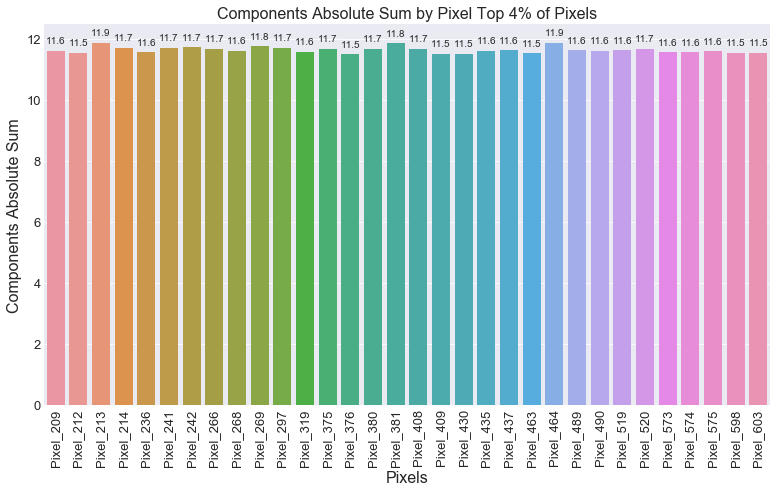

In [47]:
df6 = df5[df5["comp_sum"] > w]
plt.figure(figsize = (13,7))
b = sns.barplot(x = df6.index, y = "comp_sum", data = df6)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Components Absolute Sum by Pixel Top 4% of Pixels", fontsize = 16)
plt.xlabel("Pixels", fontsize = 16)
plt.ylabel("Components Absolute Sum",fontsize = 16)
for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')

From the plot above we can see that the middle pixels are consistently appearing with significant loadings. The range goes from pixel 209 to pixel 603 which is the middle of the image. These pixel seem to be the most important ones across all principal components.

In [48]:
## created a new dataframe for all pixels and PCs
df4 = df4.reset_index()
df4=df4.rename(columns = {'index':'PCA'})
df7 = pd.melt(df4, id_vars=["PCA"], var_name="Pixel")

df7.head()

,PCA,Pixel,value
0,PC 1,Pixel_0,5.265725e-20
1,PC 2,Pixel_0,1.816922e-19
2,PC 3,Pixel_0,1.638503e-20
3,PC 4,Pixel_0,4.252036e-19
4,PC 5,Pixel_0,2.311752e-20


#### Number of Times a Pixel is Bigger than the Mean

In [49]:
mean = df7.value.mean()
print("Mean=", mean)
print("--"*40)
df_mean = df7[df7["value"] > mean]
print(df_mean['Pixel'].value_counts().head(20))
df_mean2 = pd.DataFrame(df_mean['Pixel'].value_counts().head(20))

Mean= 0.022381818775505564
--------------------------------------------------------------------------------
Pixel_318    196
Pixel_209    190
Pixel_430    190
Pixel_241    190
Pixel_573    190
Pixel_522    189
Pixel_355    189
Pixel_213    188
Pixel_374    188
Pixel_319    188
Pixel_464    188
Pixel_297    187
Pixel_429    187
Pixel_598    187
Pixel_603    187
Pixel_352    187
Pixel_214    186
Pixel_236    186
Pixel_519    186
Pixel_458    186
Name: Pixel, dtype: int64


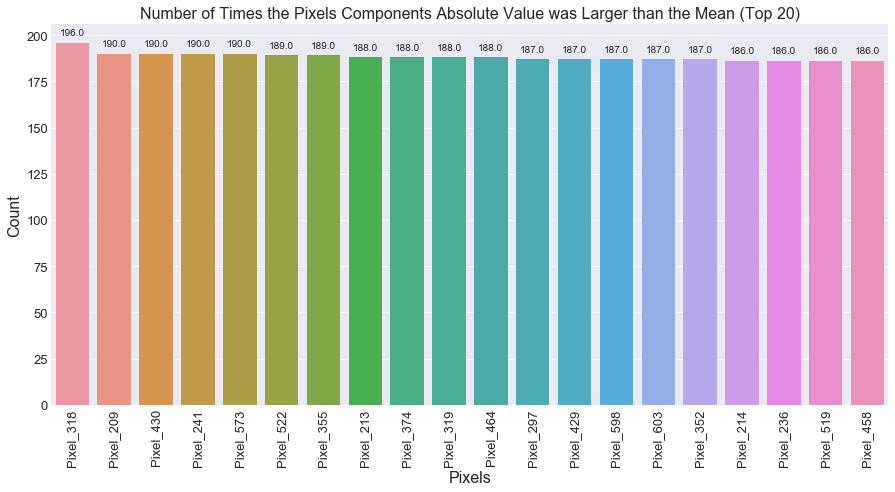

In [50]:
plt.figure(figsize = (15,7))
b = sns.barplot(x = df_mean2.index, y = "Pixel", data = df_mean2)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Number of Times the Pixels Components Absolute Value was Larger than the Mean (Top 20)", fontsize = 16)
plt.xlabel("Pixels", fontsize = 16)
plt.ylabel("Count",fontsize = 16)
for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')

### Number of Times a Pixel is Bigger than the 75% of the Data

In [51]:
pct_75 = np.percentile(df7.value,75)
print("75%=", pct_75)
print("--"*40)
df_75 = df7[df7["value"] > pct_75]
print(df_75['Pixel'].value_counts().head(10))
df75 = pd.DataFrame(df_75['Pixel'].value_counts().head(10))
df75.head()

75%= 0.035853427801765106
--------------------------------------------------------------------------------
Pixel_381    148
Pixel_237    148
Pixel_318    148
Pixel_213    148
Pixel_603    146
Pixel_519    146
Pixel_520    145
Pixel_269    145
Pixel_601    145
Pixel_209    144
Name: Pixel, dtype: int64


,Pixel
Pixel_381,148
Pixel_237,148
Pixel_318,148
Pixel_213,148
Pixel_603,146


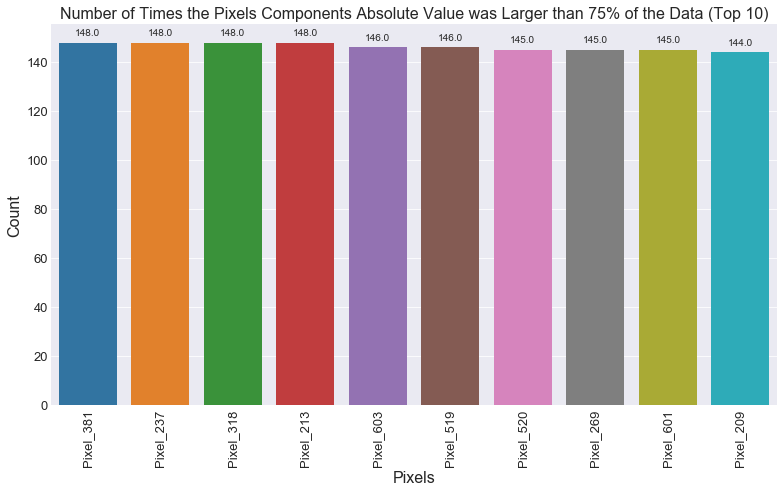

In [52]:
plt.figure(figsize = (13,7))
b = sns.barplot(x = df75.index, y = "Pixel", data = df75)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Number of Times the Pixels Components Absolute Value was Larger than 75% of the Data (Top 10)", fontsize = 16)
plt.xlabel("Pixels", fontsize = 16)
plt.ylabel("Count",fontsize = 16)
for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')

### Number of Times a Pixel is Bigger than the 85% of the Data

In [53]:
pct_85 = np.percentile(df7.value,85)
print("85%=", pct_85)
print("--"*40)
df_85 = df7[df7["value"] > pct_85]
print(df_85['Pixel'].value_counts().head(10))
df85 = pd.DataFrame(df_85['Pixel'].value_counts().head(10))

85%= 0.05174982676816218
--------------------------------------------------------------------------------
Pixel_520    103
Pixel_213    102
Pixel_571    102
Pixel_266    101
Pixel_574    101
Pixel_603    100
Pixel_297    100
Pixel_627     99
Pixel_410     99
Pixel_408     99
Name: Pixel, dtype: int64


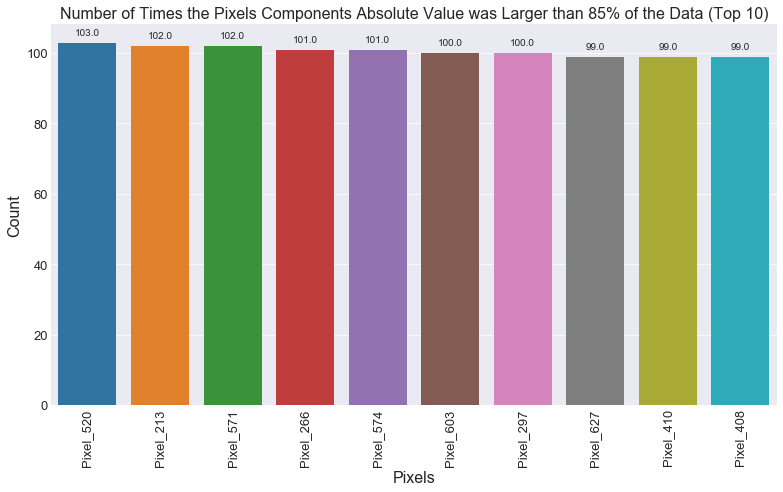

In [54]:
plt.figure(figsize = (13,7))
b = sns.barplot(x = df85.index, y = "Pixel", data = df85)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Number of Times the Pixels Components Absolute Value was Larger than 85% of the Data (Top 10)", 
          fontsize = 16)
plt.xlabel("Pixels", fontsize = 16)
plt.ylabel("Count",fontsize = 16)
for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')

### Number of Times a Pixel is Bigger than the 95% of the Data

In [55]:
pct_95 = np.percentile(df7.value,95)
print("95%=", pct_95)
print("--"*40)
df_95 = df7[df7["value"] > pct_95]
print(df_95['Pixel'].value_counts().head(10))
df95 = pd.DataFrame(df_95['Pixel'].value_counts().head(10))

95%= 0.0807730914325079
--------------------------------------------------------------------------------
Pixel_436    51
Pixel_214    45
Pixel_211    44
Pixel_326    44
Pixel_292    43
Pixel_547    43
Pixel_409    42
Pixel_408    42
Pixel_382    42
Pixel_353    42
Name: Pixel, dtype: int64


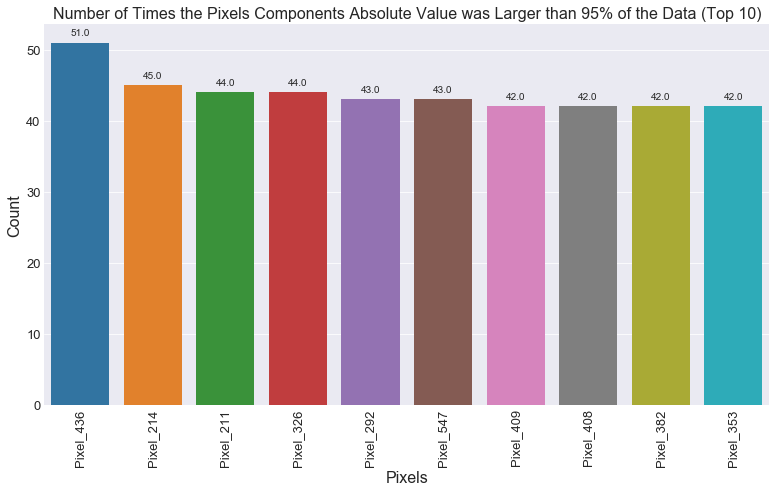

In [56]:
plt.figure(figsize = (13,7))
b = sns.barplot(x = df95.index, y = "Pixel", data = df95)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Number of Times the Pixels Components Absolute Value was Larger than 95% of the Data (Top 10)", 
          fontsize = 16)
plt.xlabel("Pixels", fontsize = 16)
plt.ylabel("Count",fontsize = 16)
for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')

When comparing the absolute sum barplot that was first made in this problem to the other four barplots I saw that the pixels that appear consistently are from the range of pixel 200 to pixel 650. Pixels that were in the first plot seem to be  in many of the other barplots. Which provides information that the pixels from the first barplot are appearing  consistently across all principal components. When looking at the last barplot, which was the number of times a pixel was greater than 95% of the data, the pixels that are in the top 10 are in a small range from pixel 211 to pixel 547. This shows that the middle of the images is where the significant loadings are that appear consistently. 

# Probelm 5.

### First 10 PCs in a 28x28 pixel grid

In [57]:
def pca_plot(x):
    g = sns.heatmap(pca.components_[x, :].reshape(28, 28), cmap='gray_r')
    g.set_title("{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[x]*100),
        fontsize=20)

### PC 1

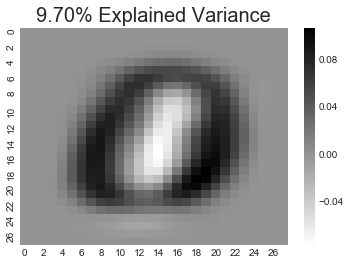

In [58]:
pca_plot(0)

### PC 2

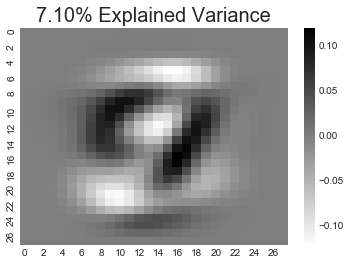

In [59]:
pca_plot(1)

### PC 3

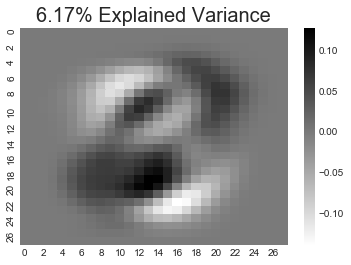

In [60]:
pca_plot(2)

### PC 4

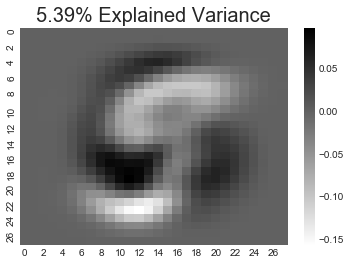

In [61]:
pca_plot(3)

### PC 5 

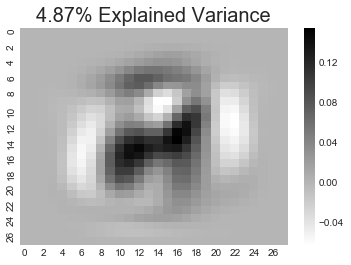

In [62]:
pca_plot(4)

### PC 6

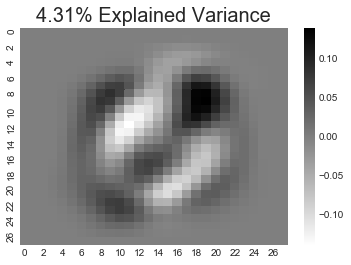

In [63]:
pca_plot(5)

### PC 7

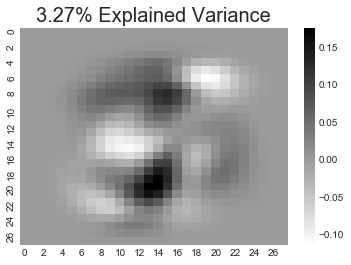

In [64]:
pca_plot(6)

### PC  8

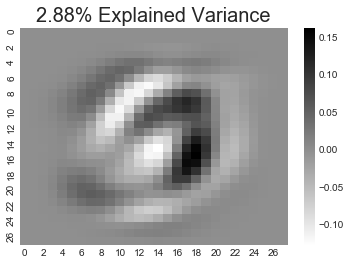

In [65]:
pca_plot(7)

### PC 9

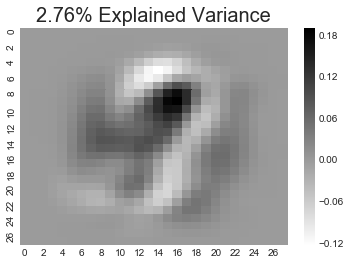

In [66]:
pca_plot(8)

### PC 9

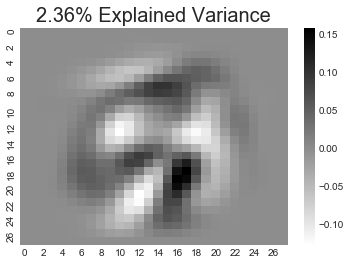

In [67]:
pca_plot(9)

### All 10 PC 

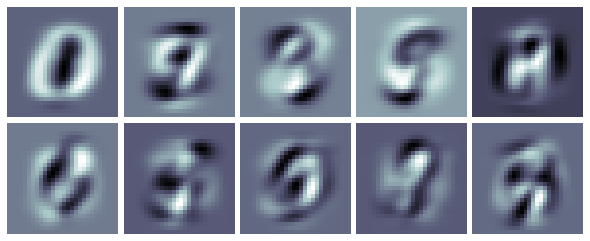

In [68]:
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca.components_[i,], (28,28)), cmap=plt.cm.bone, interpolation='nearest') 


### PCA Reconstruction of Data

In [69]:
X_recovered = pca.inverse_transform(pca_result)
x_rec = pd.DataFrame(X_recovered)
x_rec.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,4.901695e-14,1.752540e-13,-4.686242e-14,-1.615190e-13,-3.480925e-14,3.515420e-13,9.642874e-14,2.126384e-14,-7.755030e-14,-2.379430e-13,...,-0.631335,-0.523966,-0.510407,-0.140351,-0.045775,-0.006649,0.0,0.0,0.0,0.0
1,1.831552e-15,-3.742919e-13,1.722737e-13,-2.620149e-13,-1.731439e-14,1.559468e-13,1.585741e-13,-8.681614e-14,3.281701e-13,6.392727e-14,...,-0.183196,-0.240792,-0.145038,0.009061,0.115335,0.032388,0.0,0.0,0.0,0.0
2,1.463951e-15,1.367055e-14,-2.045661e-13,-2.246776e-14,1.255346e-13,-2.373899e-13,5.841595e-14,3.471547e-14,-5.670135e-15,4.292719e-14,...,6.101679,3.622226,2.029347,0.506210,-0.266957,-0.125638,0.0,0.0,0.0,0.0
3,-1.197214e-15,9.416593e-14,-7.734304e-14,3.342189e-14,9.027356e-14,-1.936452e-13,7.164902e-14,1.143109e-13,-6.454480e-14,-1.385685e-13,...,0.653090,0.036165,-0.108139,-0.085563,-0.079199,-0.011979,0.0,0.0,0.0,0.0
4,7.791698e-16,2.931929e-14,-2.239192e-13,1.523647e-13,-8.561633e-14,2.485526e-13,-4.180408e-14,-1.355534e-13,-1.349534e-13,-2.094407e-13,...,5.717741,1.136935,0.308522,0.064586,-0.162659,-0.019626,0.0,0.0,0.0,0.0


### Plots of Original number and Compressed with 98% of the Variance

In [70]:
def comp_plot_image(x):
    fig = plt.figure(figsize = (13,7))
    plt.subplot(1,2,2)
    idx = x
    grid_data = x_rec.iloc[idx].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation="none", cmap = "gray")
    plt.title("Compressed", fontsize=16)
    plt.subplot(1,2,1)
    g = X.iloc[idx].as_matrix().reshape(28,28)
    plt.imshow(g, interpolation="none", cmap = "gray")
    plt.title("Original", fontsize=16)

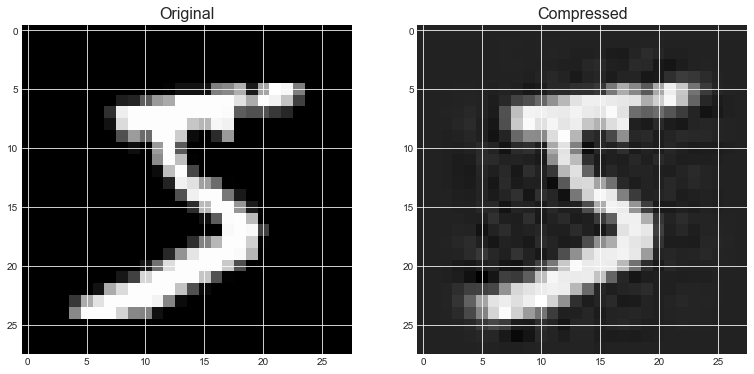

In [71]:
comp_plot_image(0)

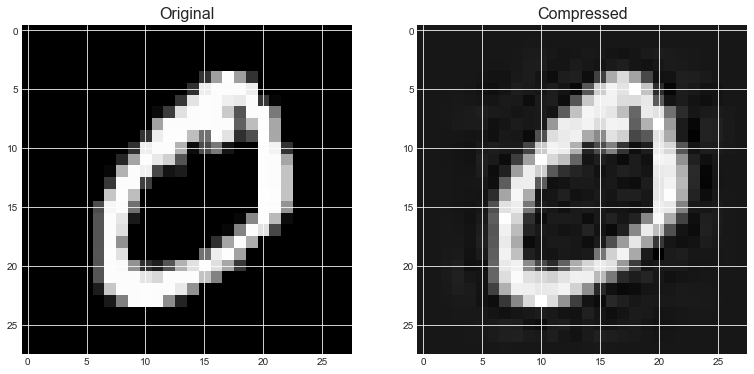

In [72]:
comp_plot_image(1)

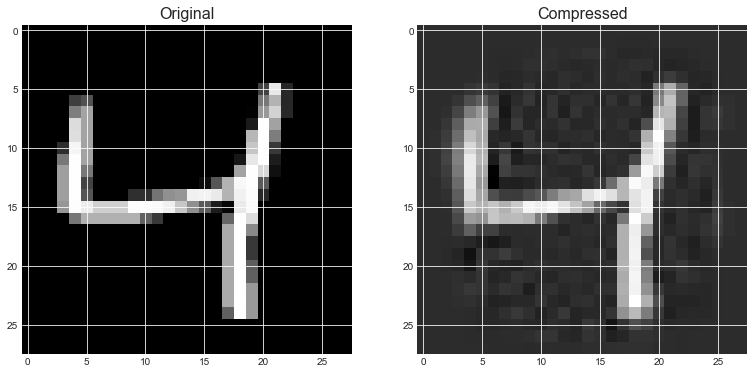

In [73]:
comp_plot_image(2)

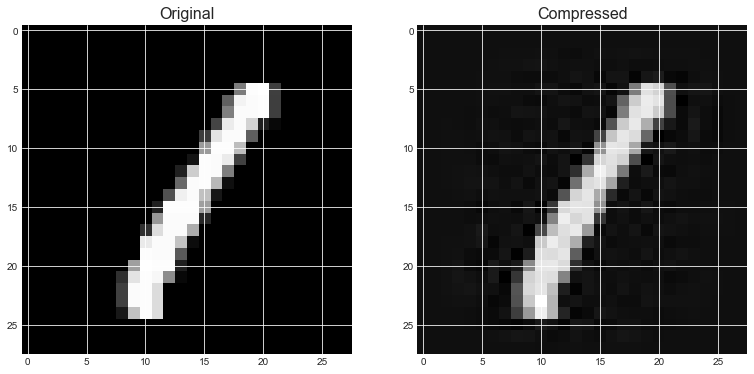

In [74]:
comp_plot_image(3)

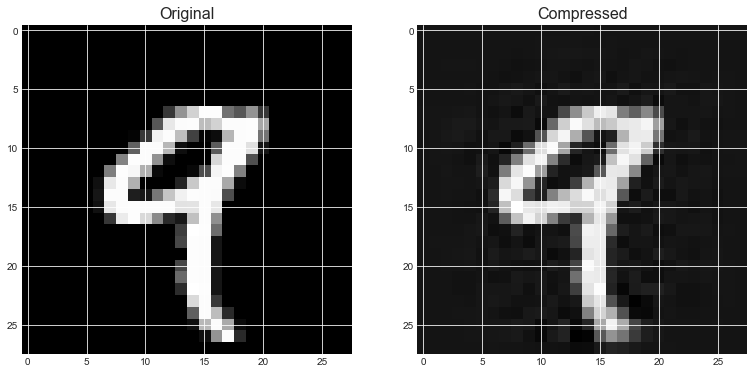

In [75]:
comp_plot_image(4)

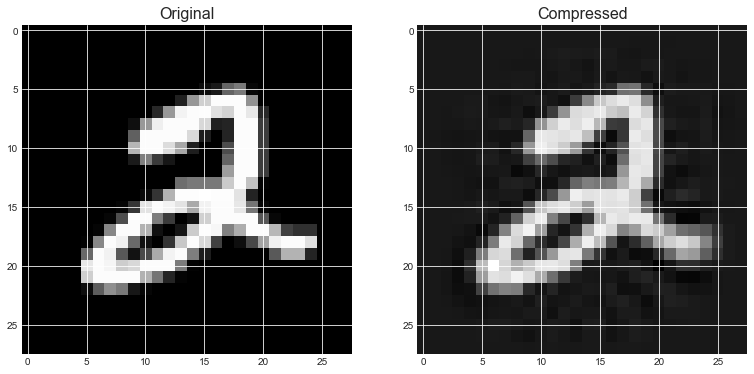

In [76]:
comp_plot_image(5)

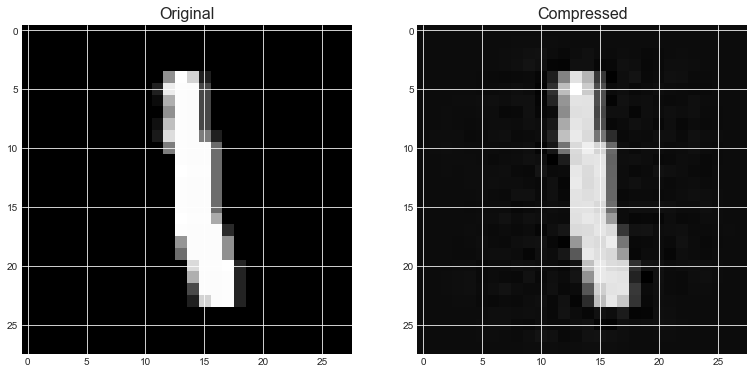

In [77]:
comp_plot_image(6)

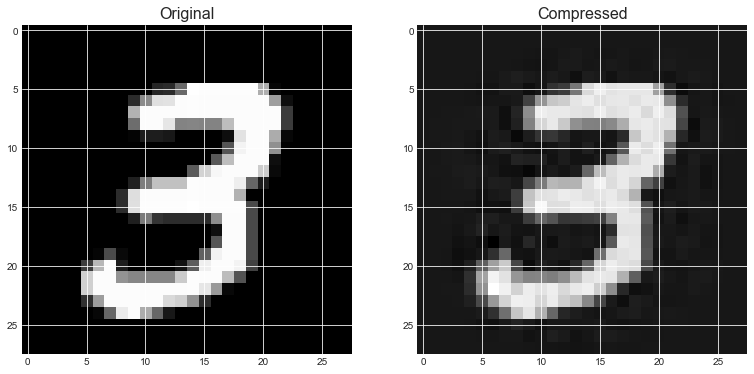

In [78]:
comp_plot_image(7)

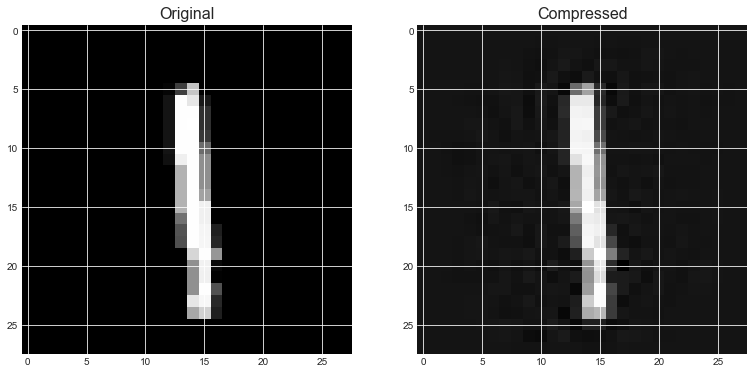

In [79]:
comp_plot_image(8)

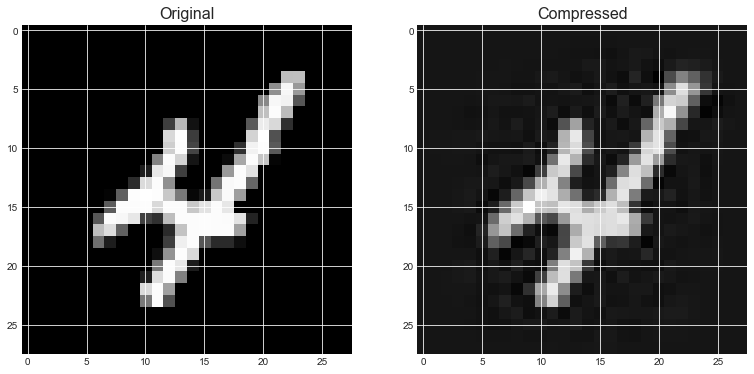

In [80]:
comp_plot_image(9)

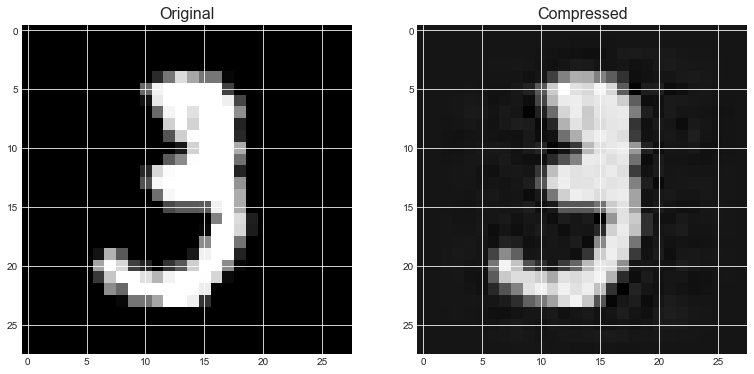

In [81]:
comp_plot_image(10)